In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  
%matplotlib inline  

In [3]:
drivers_df = pd.read_csv("drivers.csv")
circuits_df = pd.read_csv("circuits.csv")
results_df = pd.read_csv("results.csv")
races_df = pd.read_csv("races.csv")

In [7]:
drivers_df [drivers_df["nationality"]== "Mexican"]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
211,212,rebaque,\N,\N,Hector,Rebaque,1956-02-05,Mexican,http://en.wikipedia.org/wiki/Hector_Rebaque
344,345,rodriguez,\N,\N,Pedro,Rodríguez,1940-01-18,Mexican,http://en.wikipedia.org/wiki/Pedro_Rodr%C3%ADg...
381,382,solana,\N,\N,Moisés,Solana,1935-12-26,Mexican,http://en.wikipedia.org/wiki/Mois%C3%A9s_Solana
454,454,ricardo_rodriguez,\N,\N,Ricardo,Rodríguez,1942-02-14,Mexican,http://en.wikipedia.org/wiki/Ricardo_Rodr%C3%A...
814,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez
820,821,gutierrez,21,GUT,Esteban,Gutiérrez,1991-08-05,Mexican,http://en.wikipedia.org/wiki/Esteban_Guti%C3%A...


In [17]:
drivers_df [drivers_df["driverId"]== 815]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
814,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez


In [40]:
results_checo_perez = results_df [results_df["driverId"] == 815]
results_checo_perez

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
20797,20800,841,815,15,17,13,\N,D,22,0.0,58,\N,\N,39,6,1:29.962,212.209,2
20818,20821,842,815,15,17,16,\N,R,21,0.0,23,\N,\N,19,15,1:43.298,193.177,3
20838,20841,843,815,15,17,12,17,17,17,0.0,55,\N,\N,39,9,1:41.643,193.063,11
20859,20862,844,815,15,17,15,14,14,14,0.0,57,\N,\N,46,9,1:30.797,211.645,11
20878,20881,845,815,15,17,12,9,9,9,2.0,65,\N,\N,55,6,1:27.247,192.075,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25376,25382,1072,815,9,11,5,\N,R,17,0.0,14,\N,\N,9,17,1:34.138,236.104,4
25394,25400,1073,815,9,11,4,15,15,15,0.0,55,\N,\N,51,2,1:26.419,219.993,5
25417,25423,1074,815,9,11,4,18,18,18,0.0,56,\N,\N,52,4,1:36.089,202.762,5
25423,25429,1075,815,9,11,1,4,4,4,12.0,50,+10.800,5070093,46,4,1:32.042,241.481,1


In [7]:
len(results_df.loc[results_df['driverId'] == 815, 'resultId'].value_counts())
print(f"Total de grandes premios de Checo Perez = {len(results_df.loc[results_df['driverId'] == 815, 'resultId'].value_counts())}")

Total de grandes premios de Checo Perez = 218


In [8]:

total_puntos_checo_perez = results_df.loc[results_df['driverId'] == 815, 'points'].sum()
print(f"Total de Puntos de Checo Perez = {total_puntos_checo_perez}")

Total de Puntos de Checo Perez = 926.0


In [9]:
##Promedio de Puntos Por Carrera de Perez
promedio_puntos_carrera_checo = total_puntos_checo_perez/(len(results_df.loc[results_df['driverId'] == 815, 'resultId'].value_counts()))

print(f"Promedio de Puntos por carrera de Checo Perez : {promedio_puntos_carrera_checo}")

Promedio de Puntos por carrera de Checo Perez : 4.247706422018348


<Figure size 864x144 with 0 Axes>

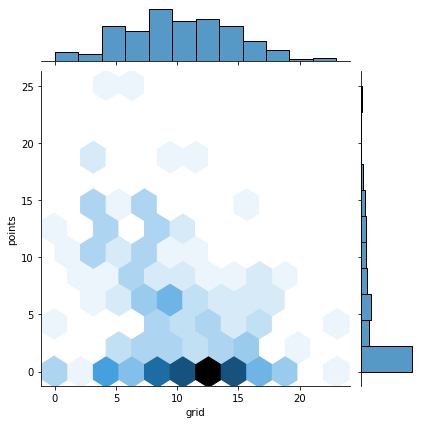

In [62]:
plt.figure(figsize=(12,2))
sns.jointplot(x="grid", y="points",data=results_checo_perez,kind="hex",palette="green")

<Figure size 864x144 with 0 Axes>

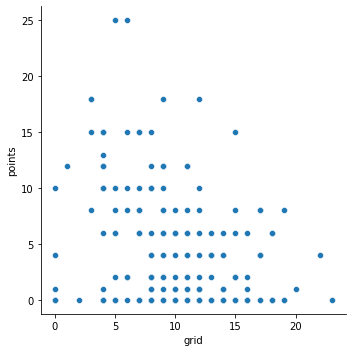

In [33]:
plt.figure(figsize=(12,2))
sns.relplot(x="grid", y="points",data=results_checo_perez)

<AxesSubplot:xlabel='resultId', ylabel='points'>

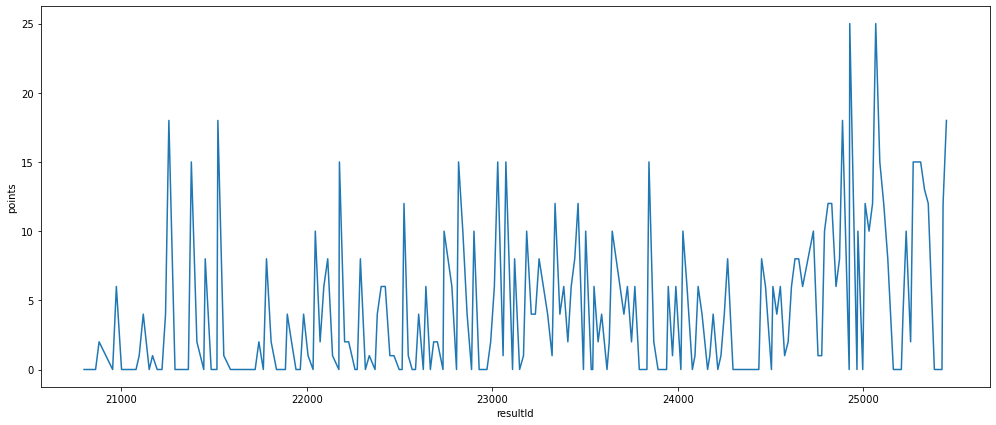

In [35]:
plt.figure(figsize=(17,7))
sns.lineplot(x="resultId", y="points",data=results_checo_perez)

<AxesSubplot:xlabel='grid', ylabel='position'>

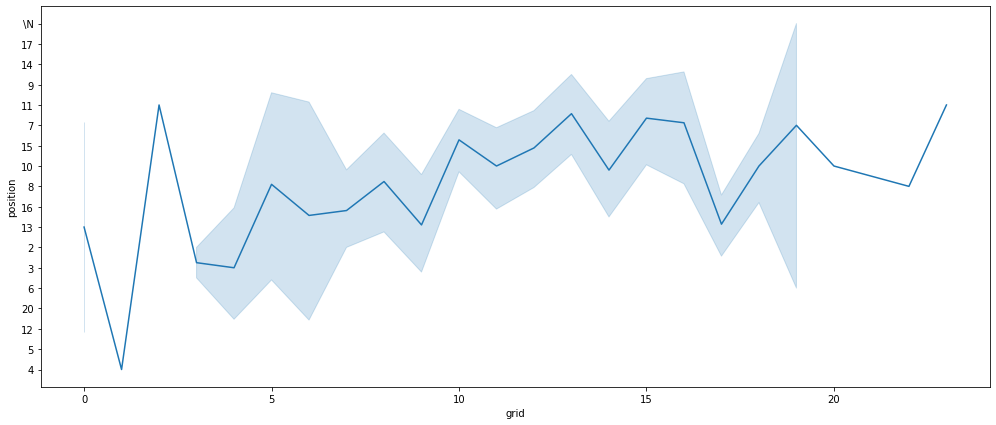

In [38]:
plt.figure(figsize=(17,7))
sns.lineplot(x="grid", y="position",data=results_checo_perez)

In [39]:
races_df.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,29/03/09,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,05/04/09,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,19/04/09,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,26/04/09,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,10/05/09,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [41]:
races_df[races_df["raceId"]==1076]

,raceId,year,round,circuitId,name,date,time,url
1059,1076,2022,3,1,Australian Grand Prix,10/04/22,5:00:00,http://en.wikipedia.org/wiki/2022_Australian_G...


In [63]:
drivers_df [drivers_df["nationality"]== "British"]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
13,14,coulthard,\N,COU,David,Coulthard,1971-03-27,British,http://en.wikipedia.org/wiki/David_Coulthard
17,18,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
18,19,davidson,\N,DAV,Anthony,Davidson,1979-04-18,British,http://en.wikipedia.org/wiki/Anthony_Davidson
50,51,wilson,\N,\N,Justin,Wilson,1978-07-31,British,http://en.wikipedia.org/wiki/Justin_Wilson_(ra...
...,...,...,...,...,...,...,...,...,...
828,829,stevens,28,STE,Will,Stevens,1991-06-28,British,http://en.wikipedia.org/wiki/Will_Stevens
834,835,jolyon_palmer,30,PAL,Jolyon,Palmer,1991-01-20,British,http://en.wikipedia.org/wiki/Jolyon_Palmer
844,846,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
845,847,russell,63,RUS,George,Russell,1998-02-15,British,http://en.wikipedia.org/wiki/George_Russell_%2...


In [69]:
len(results_df.loc[results_df['driverId'] == 1, 'resultId'].value_counts())
print(f"Total de grandes premios de Hamilton = {len(results_df.loc[results_df['driverId'] == 1, 'resultId'].value_counts())}")

Total de grandes premios de Hamilton = 291


In [65]:
total_puntos_hamitlon = results_df.loc[results_df['driverId'] == 1, 'points'].sum()
print(f"Total de Puntos de Hamilton = {total_puntos_hamitlon}")

Total de Puntos de Hamilton = 4191.5


In [66]:
##Promedio de Puntos Por Carrera de Perez
promedio_puntos_hamitlon = total_puntos_hamitlon/(len(results_df.loc[results_df['driverId'] == 1, 'resultId'].value_counts()))

print(f"Promedio de Puntos por carrera de Hamilton : {promedio_puntos_hamitlon}")

Promedio de Puntos por carrera de Hamilton : 14.403780068728523


In [4]:
total_puntos_barrichello = results_df.loc[results_df['driverId'] == 22, 'points'].sum()
print(f"Total de Puntos de Barrichello = {total_puntos_barrichello}")

Total de Puntos de Barrichello = 658.0


In [5]:
##Promedio de Puntos Por Carrera de Perez
promedio_puntos_barrichello = total_puntos_barrichello/(len(results_df.loc[results_df['driverId'] == 22, 'resultId'].value_counts()))

print(f"Promedio de Puntos por carrera de Barrichello : {promedio_puntos_barrichello}")

Promedio de Puntos por carrera de Barrichello : 2.01840490797546


In [6]:
len(results_df.loc[results_df['driverId'] == 22, 'resultId'].value_counts())

326

In [45]:
results_merge_drivers = pd.merge(drivers_df, results_df, on='driverId')

In [64]:
results_merge_drivers[results_merge_drivers["driverId"]==815]

,driverId,driverRef,number_x,code,forename,surname,dob,nationality,url,resultId,...,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
23081,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,20800,...,22,0.0,58,\N,\N,39,6,1:29.962,212.209,2
23082,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,20821,...,21,0.0,23,\N,\N,19,15,1:43.298,193.177,3
23083,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,20841,...,17,0.0,55,\N,\N,39,9,1:41.643,193.063,11
23084,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,20862,...,14,0.0,57,\N,\N,46,9,1:30.797,211.645,11
23085,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,20881,...,9,2.0,65,\N,\N,55,6,1:27.247,192.075,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23294,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,25382,...,17,0.0,14,\N,\N,9,17,1:34.138,236.104,4
23295,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,25400,...,15,0.0,55,\N,\N,51,2,1:26.419,219.993,5
23296,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,25423,...,18,0.0,56,\N,\N,52,4,1:36.089,202.762,5
23297,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,25429,...,4,12.0,50,+10.800,5070093,46,4,1:32.042,241.481,1


In [67]:
results_merge_drivers.loc[results_merge_drivers['driverId'] == 815, 'positionOrder'].mean()

10.027522935779816

In [68]:
results_merge_drivers.loc[results_merge_drivers['driverId'] == 1, 'positionOrder'].mean()

4.701030927835052